In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [20]:
import pandas as pd
df=pd.read_csv("/content/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", encoding="latin-1", sep =';')

df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [21]:
feats = ['3', '4']

In [22]:
df[feats].head()

,3,4
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1002.0,1002.0
4,1061.5,1061.5


1.EDA

In [23]:
# Kiem tra dữ liệu thiếu
df[feats].isna().mean()

3    0.0
4    0.0
dtype: float64

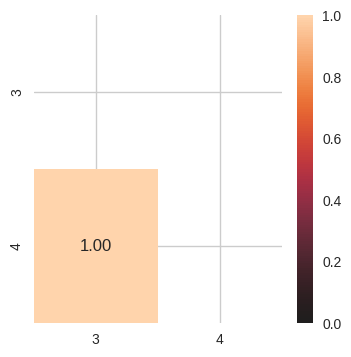

In [24]:
# Kiem tra độ tương quan bằng biểu đồ hearmap
mask = np.triu(np.ones_like(df[feats].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(df[feats].corr(), mask=mask, vmax=1, vmin=0, center=0,annot=True,fmt='.2f');

In [102]:
import plotly.express as px
fig = px.line(y=df['3'], x=df['Ngày'])
fig.update_traces(line_color='red')
fig.update_layout(xaxis_title="Ngày",
                  yaxis_title="Cột 3",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

In [27]:
fig = px.line(y=df['4'], x=df['Ngày'])
fig.update_traces(line_color='red')
fig.update_layout(xaxis_title="Ngày",
                  yaxis_title="Cột 4",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

In [29]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X = transformer.fit_transform(np.array(df[feats]))

In [30]:
X[:5]

array([[-0.72216308, -0.72215304],
       [-0.19550973, -0.19550131],
       [-0.49359743, -0.49358809],
       [-0.3640769 , -0.36406796],
       [ 0.20257544,  0.20258265]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

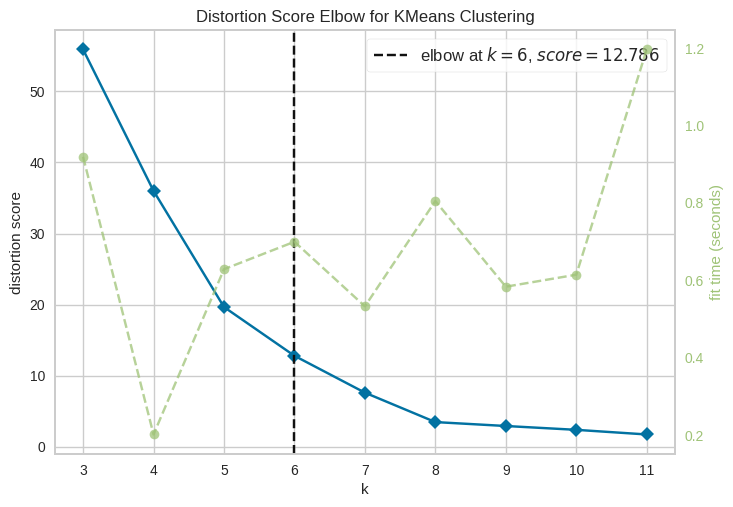

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(3,12))
Elbow_M.fit(X)
Elbow_M.show();

In [32]:
BGM = BayesianGaussianMixture(n_components=6,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [33]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats)
df_new[[f'predict_proba_{i}' for i in range(6)]]=pp
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(6):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [36]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):
  tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
  vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

  model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

  model_list.append(model)

[200]	valid_0's multi_logloss: 0.245603
[200]	valid_0's multi_logloss: 0.00022616
[400]	valid_0's multi_logloss: 0.000225848
[600]	valid_0's multi_logloss: 0.000225757
[800]	valid_0's multi_logloss: 0.000225715
[1000]	valid_0's multi_logloss: 0.000225691
[1200]	valid_0's multi_logloss: 0.000225676
[1400]	valid_0's multi_logloss: 0.000225666
[1600]	valid_0's multi_logloss: 0.000225658
[1800]	valid_0's multi_logloss: 0.000225652
[2000]	valid_0's multi_logloss: 0.000225648
[2200]	valid_0's multi_logloss: 0.000225644
[2400]	valid_0's multi_logloss: 0.000225641
[2600]	valid_0's multi_logloss: 0.000225638
[2800]	valid_0's multi_logloss: 0.000225636
[3000]	valid_0's multi_logloss: 0.000225634
[3200]	valid_0's multi_logloss: 0.000225632
[3400]	valid_0's multi_logloss: 0.000225631
[3600]	valid_0's multi_logloss: 0.00022563
[3800]	valid_0's multi_logloss: 0.000225629
[4000]	valid_0's multi_logloss: 0.000225628
[4200]	valid_0's multi_logloss: 0.000225627
[4400]	valid_0's multi_logloss: 0.00022562

In [37]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [38]:
labels=np.argmax(lgb_preds,axis=1)

In [39]:
u = np.unique(labels)
u

array([0, 1, 2, 3])

<ipython-input-40-b7001a6c962c>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



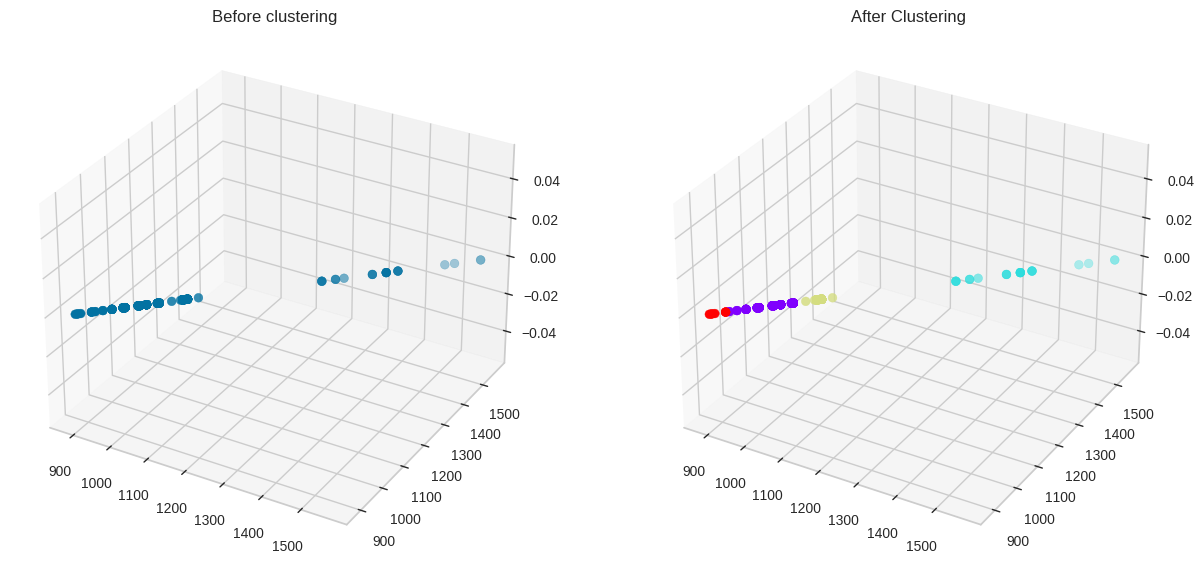

In [40]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

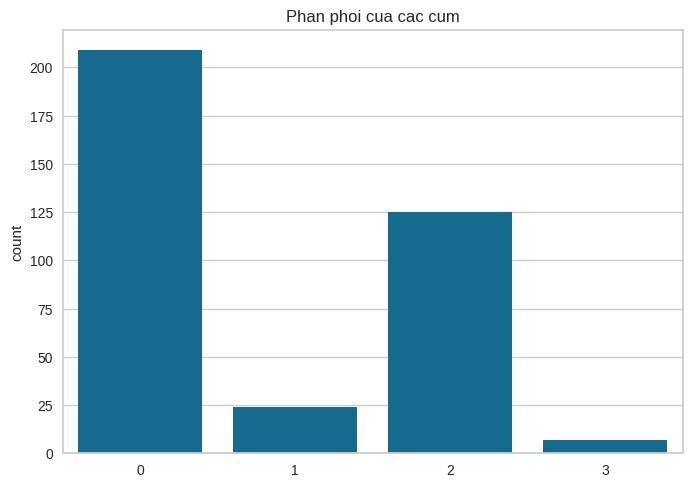

In [41]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phan phoi cua cac cum")
plt.show()

Thu nghiệm với k=4

In [42]:
BGM = BayesianGaussianMixture(n_components=4,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [43]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats)
df_new[[f'predict_proba_{i}' for i in range(4)]]=pp
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(4):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [44]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

    model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

    model_list.append(model)

[200]	valid_0's multi_logloss: 0.00596865
[400]	valid_0's multi_logloss: 0.00597142
[200]	valid_0's multi_logloss: 0.00288963
[400]	valid_0's multi_logloss: 0.00286064
[600]	valid_0's multi_logloss: 0.00284089
[800]	valid_0's multi_logloss: 0.00282657
[1000]	valid_0's multi_logloss: 0.00281573
[1200]	valid_0's multi_logloss: 0.00280725
[1400]	valid_0's multi_logloss: 0.00280043
[1600]	valid_0's multi_logloss: 0.00279484
[1800]	valid_0's multi_logloss: 0.00277218
[2000]	valid_0's multi_logloss: 0.00276818
[2200]	valid_0's multi_logloss: 0.00276475
[2400]	valid_0's multi_logloss: 0.00276177
[2600]	valid_0's multi_logloss: 0.00275916
[2800]	valid_0's multi_logloss: 0.00275686
[3000]	valid_0's multi_logloss: 0.00275481
[3200]	valid_0's multi_logloss: 0.00275298
[3400]	valid_0's multi_logloss: 0.00275133
[3600]	valid_0's multi_logloss: 0.00274984
[3800]	valid_0's multi_logloss: 0.00274848
[4000]	valid_0's multi_logloss: 0.00274724
[4200]	valid_0's multi_logloss: 0.00274611
[4400]	valid_0's 

In [45]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [46]:
u = np.unique(labels)
u

array([0, 1, 2])

<ipython-input-47-dfa039852336>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



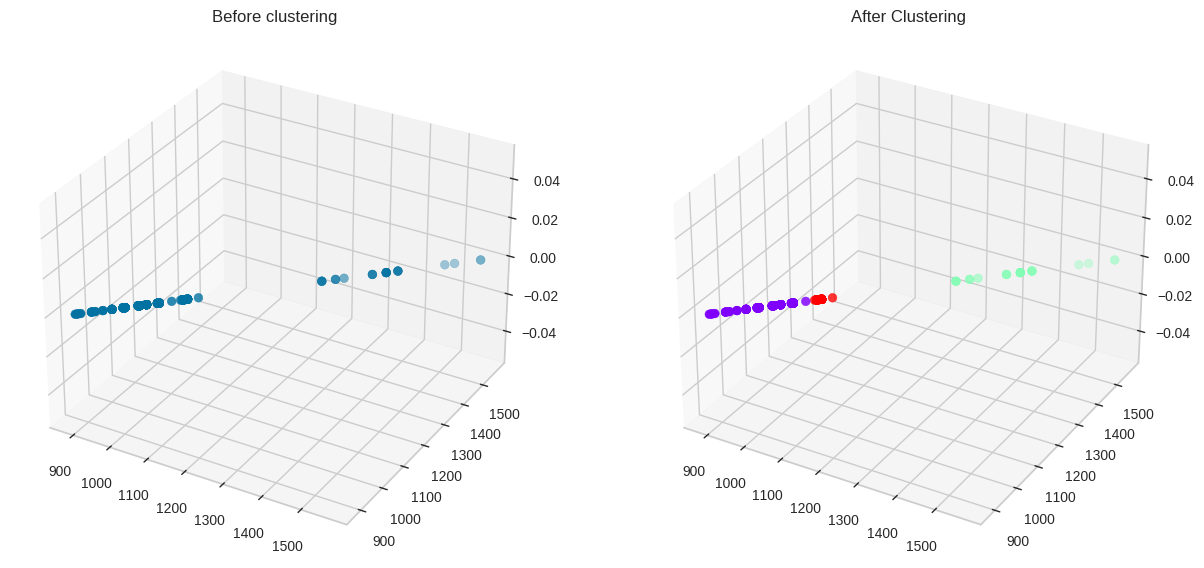

In [47]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7909 (\N{LATIN SMALL LETTER U WITH DOT BELOW}) missing from current font.



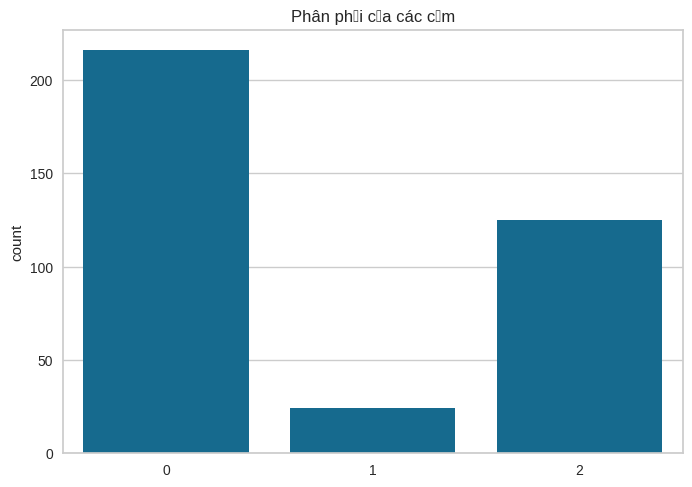

In [48]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

thử nghiệm với k =3

In [49]:
BGM = BayesianGaussianMixture(n_components=3,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [50]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats)
df_new[[f'predict_proba_{i}' for i in range(3)]]=pp
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(3):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [51]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

    model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

    model_list.append(model)

[200]	valid_0's multi_logloss: 0.00596865
[400]	valid_0's multi_logloss: 0.00597142
[200]	valid_0's multi_logloss: 0.00288963
[400]	valid_0's multi_logloss: 0.00286064
[600]	valid_0's multi_logloss: 0.00284089
[800]	valid_0's multi_logloss: 0.00282657
[1000]	valid_0's multi_logloss: 0.00281573
[1200]	valid_0's multi_logloss: 0.00280725
[1400]	valid_0's multi_logloss: 0.00280043
[1600]	valid_0's multi_logloss: 0.00279484
[1800]	valid_0's multi_logloss: 0.00277218
[2000]	valid_0's multi_logloss: 0.00276818
[2200]	valid_0's multi_logloss: 0.00276475
[2400]	valid_0's multi_logloss: 0.00276177
[2600]	valid_0's multi_logloss: 0.00275916
[2800]	valid_0's multi_logloss: 0.00275686
[3000]	valid_0's multi_logloss: 0.00275481
[3200]	valid_0's multi_logloss: 0.00275298
[3400]	valid_0's multi_logloss: 0.00275133
[3600]	valid_0's multi_logloss: 0.00274984
[3800]	valid_0's multi_logloss: 0.00274848
[4000]	valid_0's multi_logloss: 0.00274724
[4200]	valid_0's multi_logloss: 0.00274611
[4400]	valid_0's 

In [52]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [53]:
u = np.unique(labels)
u

array([0, 1, 2])

<ipython-input-54-dfa039852336>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



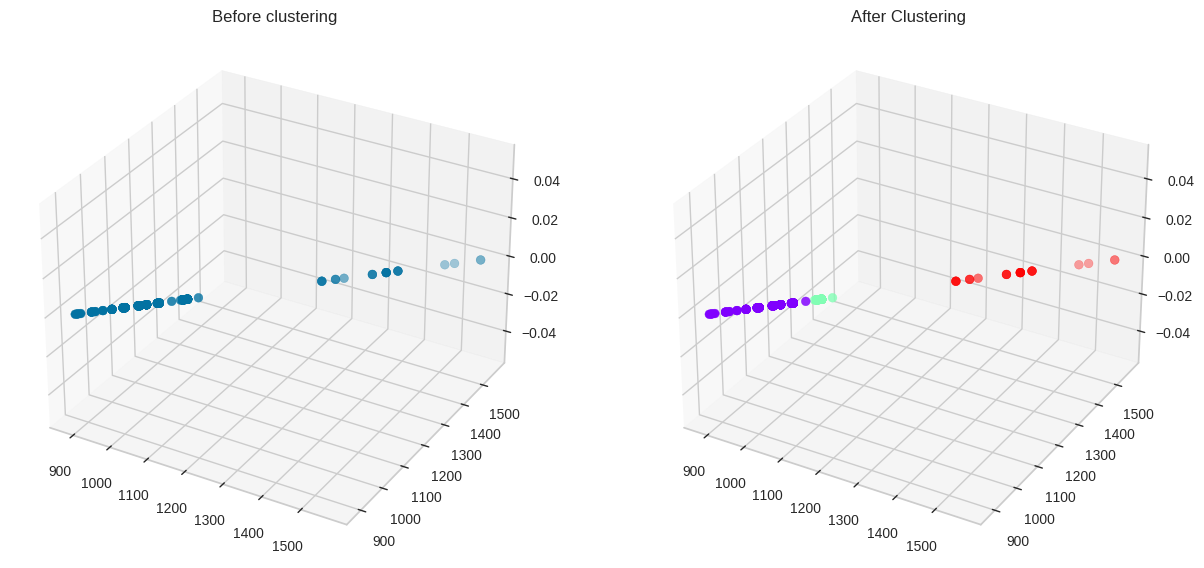

In [54]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

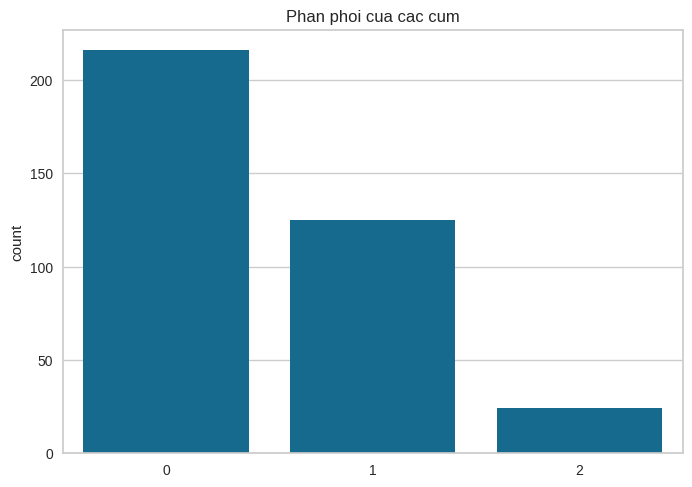

In [56]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phan phoi cua cac cum")
plt.show()

3. Sử dụng GRU để dự đoán giá trị tương lai

In [57]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import GRU

In [64]:
feats = ['Ngày', '3', '4']

In [65]:
df = df[feats]

In [66]:
df


,Ngày,3,4
0,01/01/2021,964.4,964.4
1,01/02/2021,1019.7,1019.7
2,01/03/2021,988.4,988.4
3,01/04/2021,1002.0,1002.0
4,01/05/2021,1061.5,1061.5
...,...,...,...
360,27/12/2021,1002.0,1002.0
361,28/12/2021,1002.0,1002.0
362,29/12/2021,1061.5,1061.5
363,30/12/2021,1022.6,1022.6


In [67]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [68]:
test_size = df[df['Ngày'].dt.month==12].shape[0]
test_size

31

In [70]:
import plotly.express as px
fig = px.line(y=df['3'], x=df['Ngày'])
fig.update_traces(line_color='red')
fig.update_layout(xaxis_title="Ngày",
                  yaxis_title="1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

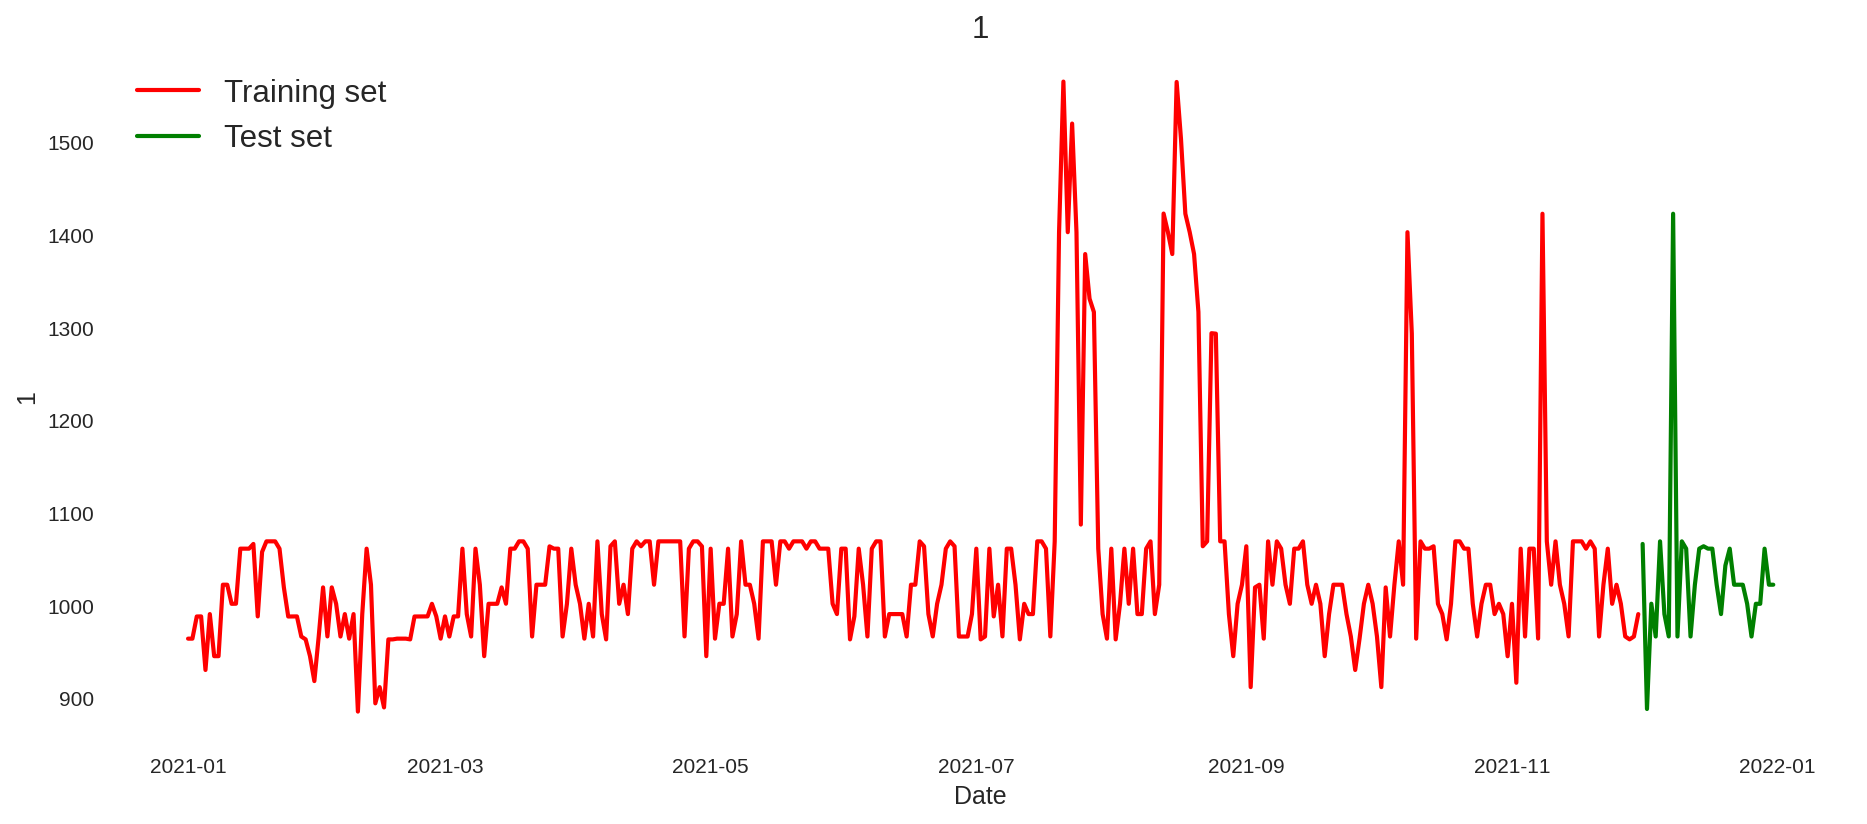

In [73]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['3'][:-test_size], color='red', lw=2)
plt.plot(df['Ngày'][-test_size:], df['3'][-test_size:], color='green', lw=2)
plt.title('1', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['3']])

MinMaxScaler()

In [76]:
window_size = 10

In [77]:
train_data = df[['3']][:-test_size]
train_data = scaler.transform(train_data)

In [78]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

In [80]:
test_data = df[['3']][-test_size-window_size:]
test_data = scaler.transform(test_data)

In [81]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

In [82]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [83]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [84]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (324, 10, 1)
y_train Shape:  (324, 1)
X_test Shape:   (31, 10, 1)
y_test Shape:   (31, 1)


In [85]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = GRU(units = 64, return_sequences=False)(input1)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

In [86]:
model = define_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14977 (58.50 KB)
Trainable params: 14977 (58.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 7s 169ms/step - loss: 0.0959 - val_loss: 0.0650
Epoch 2/50
10/10 [==============================] - 0s 35

In [87]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 697ms/step


In [88]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [89]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)

Test Loss: 0.01855788566172123
Test MAPE: 1.729604087102972


In [90]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

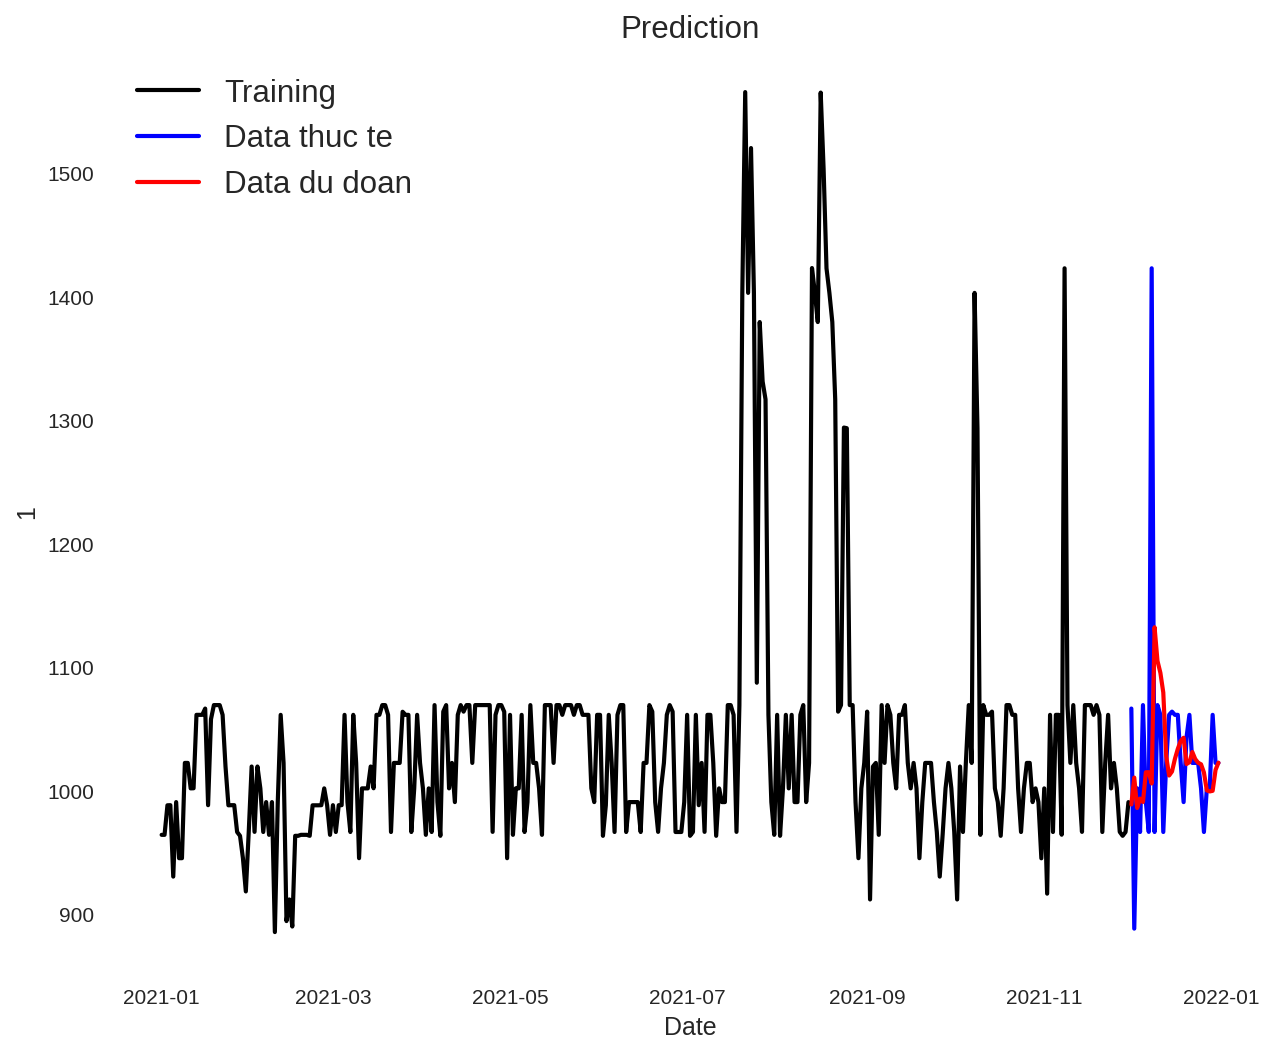

In [94]:
plt.figure(figsize=(10, 8), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training', 'Data thuc te', 'Data du doan'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()